In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')



In [2]:
mouse_data = pd.read_csv("resources/mouse_drug_data.csv")
clinical_data = pd.read_csv("resources/clinicaltrial_data.csv")
# mouse_data.head()
# clinical_data.head()

In [3]:
combined_data = pd.merge(clinical_data, mouse_data, on= 'Mouse ID', how='left')
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [4]:
Tumor_volume_mean = combined_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()
Tumor_volume_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
Tumor_volume_sem = combined_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem().reset_index()
Tumor_volume_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
Tumor_mean_df = Tumor_volume_mean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
Tumor_mean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


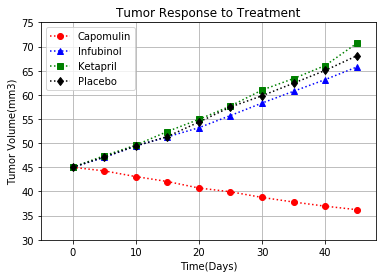

In [7]:
x_axis = Tumor_mean_df.index
plt.plot(x_axis, Tumor_mean_df.Capomulin, marker = 'o', ls = ':', color = 'red', label ="Capomulin")
plt.plot(x_axis, Tumor_mean_df.Infubinol, marker = '^', ls =':', color = 'blue', label = "Infubinol")
plt.plot(x_axis, Tumor_mean_df.Ketapril, marker ='s', ls =':', color ='green', label = "Ketapril")
plt.plot(x_axis, Tumor_mean_df.Placebo, marker = 'd', ls = ':', color = 'black', label = "Placebo")
plt.xlim(-5, max(x_axis)+3)
plt.ylim(30, 75)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume(mm3)")
plt.grid()
plt.legend()
plt.show()

In [8]:
Mean_Metsite = combined_data.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
Mean_Metsite = pd.DataFrame({"Metastatic Sites": Mean_Metsite})
Mean_Metsite.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
Error_Metsite = combined_data.groupby(['Drug','Timepoint'])[['Metastatic Sites']].sem()
Error_Metsite.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
Metsite_mean_df = Mean_Metsite.pivot_table(index=Mean_Metsite.index.get_level_values(1) , 
                                           columns=Mean_Metsite.index.get_level_values(0), values='Metastatic Sites')
Metsite_mean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [11]:
Mouse_count = combined_data.groupby(['Drug','Timepoint'])['Mouse ID'].count().reset_index()
Mouse_count = Mouse_count.rename(columns={"Mouse ID": "Mouse Count"})
Mouse_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
Mouse_count_df = Mouse_count.pivot(index= 'Timepoint', columns= 'Drug', values='Mouse Count')
Mouse_count_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


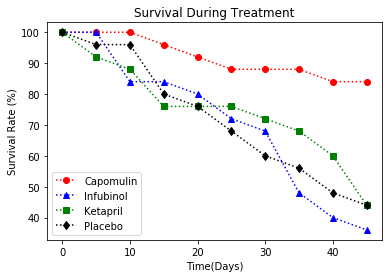

In [13]:
# To generate plot of survival days during treatment
x = Mouse_count_df.index
# Multiply column value to 4 times to count for percentages
y = Mouse_count_df.Capomulin*4
y1 = Mouse_count_df.Infubinol*4
y2 = Mouse_count_df.Ketapril*4
y3 = Mouse_count_df.Placebo*4
plt.title("Survival During Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate (%)")
plt.plot(x, y, marker ='o', color = 'r', label ='Capomulin', ls = ':')
plt.plot(x, y1, marker = '^', color = 'b', label = 'Infubinol', ls =':')
plt.plot(x, y2, marker = 's', color = 'green', label = 'Ketapril', ls = ':')
plt.plot(x, y3, marker = 'd', color = 'k', label = 'Placebo', ls = ':')
plt.legend()


plt.show()